## imports

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

# ToxCast

## Data preprocessing

### Let's take a look at the data

In [3]:
toxcast_data = pd.read_csv('toxcast_global_cdf_rdkit.csv')

In [4]:
toxcast_data.head()

,"('RDKit2DNormalized_calculated', <class 'bool'>)","('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,True,0.975099,0.013842,0.003617,0.001544,0.002240,0.003400,0.001898,0.002740,0.002258,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.307979
1,True,0.996567,0.006574,0.059485,0.147276,0.457648,0.019493,0.076205,0.957788,0.220093,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.673632
2,True,0.627583,0.010335,0.026948,0.068241,0.048620,0.033934,0.125366,0.085699,0.180002,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.591018
3,True,0.975099,0.013568,0.003617,0.001953,0.001234,0.003400,0.002277,0.001882,0.002913,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.187246
4,True,0.975099,0.013472,0.003617,0.001677,0.001063,0.003400,0.002024,0.001720,0.002471,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.317261


In [5]:
toxcast_data.describe()

,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
count,8576.000000,8576.000000,8.576000e+03,8.576000e+03,8.576000e+03,8.576000e+03,8.576000e+03,8576.000000,8576.000000,8.576000e+03,...,8.576000e+03,8.576000e+03,8.576000e+03,8576.000000,8576.000000,8.576000e+03,8.576000e+03,8.576000e+03,8576.000000,8576.000000
mean,0.664186,0.170554,2.034590e-01,2.114490e-01,2.258747e-01,1.886194e-01,2.087913e-01,0.222319,0.221245,2.428282e-01,...,3.159866e-02,7.812500e-03,5.480410e-03,0.172160,0.179225,1.749067e-03,1.084422e-02,1.283015e-01,0.188498,0.438306
std,0.392411,0.247064,2.845194e-01,2.863702e-01,2.973350e-01,2.723250e-01,2.846640e-01,0.292042,0.294871,3.087062e-01,...,1.749360e-01,8.804754e-02,7.383096e-02,0.055957,0.098605,4.178770e-02,1.035754e-01,3.323119e-01,0.133210,0.255540
min,0.000020,0.000577,3.875255e-15,2.722966e-11,8.228063e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.001335
25%,0.316180,0.007618,6.107565e-03,7.245959e-03,7.658955e-03,5.310135e-03,7.229403e-03,0.007852,0.008206,7.844741e-03,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.242871
50%,0.887037,0.045325,4.998923e-02,5.707925e-02,6.245923e-02,4.325545e-02,5.584382e-02,0.061127,0.063788,7.366013e-02,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.408772
75%,0.972095,0.235537,3.048897e-01,3.314346e-01,3.672524e-01,2.690613e-01,3.250502e-01,0.371586,0.349220,4.199528e-01,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.626745
max,0.999740,1.000000,9.998770e-01,9.997699e-01,9.998784e-01,9.998790e-01,9.997379e-01,0.999994,0.999653,9.999777e-01,...,9.999919e-01,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.998881


In [6]:
# all the values are between 0 ,1 (no need to touch them)
toxcast_data.to_numpy().max(), toxcast_data.to_numpy().min()

(1.0, 0.0)

In [7]:
#(number of features is a bit large)
toxcast_data.shape

(8576, 201)

### Assigning Labels

In [8]:
labels_df = pd.read_csv('toxcast.csv')

In [9]:
labels_df.head()

,smiles,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,[O-][N+](=O)C1=CC=C(Cl)C=C1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C[SiH](C)O[Si](C)(C)O[Si](C)(C)O[SiH](C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CN1CCN(CC1)C(=O)C1CCCCC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NC1=CC=C(C=C1)[N+]([O-])=O,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OC1=CC=C(C=C1)[N+]([O-])=O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
sorted(labels_df.isna().sum())[:4]

[0, 645, 645, 645]

So we will chose random column with least number of NAN values(645) as our labels

In [10]:
labels = []
for i in labels_df:
    if sum(labels_df[i].isna()) == 645:
        labels.append(i)

In [11]:
# Checking how balance our labesl are:
for i in labels:
    print(labels_df[i].value_counts())

0.0    7907
1.0      24
Name: TOX21_AR_BLA_Agonist_ch1, dtype: int64
0.0    7543
1.0     388
Name: TOX21_AR_BLA_Agonist_ch2, dtype: int64
0.0    7521
1.0     410
Name: TOX21_AR_BLA_Agonist_ratio, dtype: int64
0.0    7889
1.0      42
Name: TOX21_AR_BLA_Antagonist_ch1, dtype: int64
0.0    7727
1.0     204
Name: TOX21_AR_BLA_Antagonist_ch2, dtype: int64
0.0    6756
1.0    1175
Name: TOX21_AR_BLA_Antagonist_ratio, dtype: int64
0.0    7332
1.0     599
Name: TOX21_AR_BLA_Antagonist_viability, dtype: int64
0.0    7546
1.0     385
Name: TOX21_AR_LUC_MDAKB2_Agonist, dtype: int64
0.0    7081
1.0     850
Name: TOX21_AR_LUC_MDAKB2_Antagonist, dtype: int64
0.0    7123
1.0     808
Name: TOX21_AhR_LUC_Agonist, dtype: int64
0.0    6658
1.0    1273
Name: TOX21_Aromatase_Inhibition, dtype: int64
0.0    7881
1.0      50
Name: TOX21_AutoFluor_HEK293_Cell_blue, dtype: int64
0.0    7879
1.0      52
Name: TOX21_AutoFluor_HEK293_Media_blue, dtype: int64
0.0    7880
1.0      51
Name: TOX21_AutoFluor_HEPG2_Cell

In [12]:
#All of labels are badly imbalced hence we will chose the best one
portion = 0
for i in labels:
    zero, one = labels_df[i].value_counts()
    if one / zero > portion:
        final_label = i
        portion = one / zero

In [13]:
portion, final_label

(0.2854132901134522, 'TOX21_TR_LUC_GH3_Antagonist')

In [14]:
#assing final label as our label
toxcast_data['label'] = labels_df[final_label]

### Handling Nans values

In [15]:
toxcast_data.isna().sum().sum()

1081

In [16]:
list(filter((0).__ne__, toxcast_data.isna().sum()))

[109, 109, 109, 109, 645]

In [17]:
#There are onlt 4 columns have nan values and they are a small percentage among all data
#We remove that rows with no doubt

toxcast_data.dropna(inplace=True)
toxcast_data.reset_index(drop=True, inplace=True)

In [18]:
toxcast_data.isna().sum().sum()

0

### Seeking for one variable features

In [19]:
unique_columns = []
for i in toxcast_data:
    if len(toxcast_data[i].unique()) == 1:
        print(i)
        unique_columns.append(i)

('RDKit2DNormalized_calculated', <class 'bool'>)
('Ipc', <class 'numpy.float64'>)
('SMR_VSA8', <class 'numpy.float64'>)
('SlogP_VSA9', <class 'numpy.float64'>)
('VSA_EState1', <class 'numpy.float64'>)
('VSA_EState3', <class 'numpy.float64'>)
('VSA_EState4', <class 'numpy.float64'>)
('VSA_EState6', <class 'numpy.float64'>)
('VSA_EState7', <class 'numpy.float64'>)
('fr_diazo', <class 'numpy.float64'>)
('fr_prisulfonamd', <class 'numpy.float64'>)


In [20]:
unique_columns

["('RDKit2DNormalized_calculated', <class 'bool'>)",
 "('Ipc', <class 'numpy.float64'>)",
 "('SMR_VSA8', <class 'numpy.float64'>)",
 "('SlogP_VSA9', <class 'numpy.float64'>)",
 "('VSA_EState1', <class 'numpy.float64'>)",
 "('VSA_EState3', <class 'numpy.float64'>)",
 "('VSA_EState4', <class 'numpy.float64'>)",
 "('VSA_EState6', <class 'numpy.float64'>)",
 "('VSA_EState7', <class 'numpy.float64'>)",
 "('fr_diazo', <class 'numpy.float64'>)",
 "('fr_prisulfonamd', <class 'numpy.float64'>)"]

In [21]:
#One variable features hold no informaiton in our dataset so we remove that columns
toxcast_data.drop(unique_columns, axis=1, inplace=True)

In [22]:
#check one variable features again
for i in toxcast_data:
    if len(toxcast_data[i].unique()) == 1:
        print(i)

### Split features and labels

In [23]:
label = toxcast_data['label']

In [24]:
toxcast_data = toxcast_data.drop(['label'], axis=1)

###  Changing column names

In [25]:
#The columns are a little bit dizzy better to change their names to numbers
toxcast_data.columns = range(toxcast_data.shape[1])
toxcast_data.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,0.975099,0.013842,0.003617,0.001544,0.002240,0.003400,0.001898,0.002740,0.002258,0.002597,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.307979
1,0.996567,0.006574,0.059485,0.147276,0.457648,0.019493,0.076205,0.957788,0.220093,0.989140,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.673632
2,0.627583,0.010335,0.026948,0.068241,0.048620,0.033934,0.125366,0.085699,0.180002,0.115258,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.591018
3,0.975099,0.013568,0.003617,0.001953,0.001234,0.003400,0.002277,0.001882,0.002913,0.001287,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.187246
4,0.975099,0.013472,0.003617,0.001677,0.001063,0.003400,0.002024,0.001720,0.002471,0.001076,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.317261


### Removing correlated data

In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    print(len(au_corr))
    return pd.DataFrame(au_corr)


print("Top Absolute Correlations")
print(get_top_abs_correlations(toxcast_data))

Top Absolute Correlations
17955
                0
112 127  1.000000
37  39   0.999982
25  47   0.999973
32  47   0.997984
25  32   0.997873
...           ...
157 186  0.000021
60  82   0.000019
96  153  0.000018
9   103  0.000017
119 125  0.000003

[17955 rows x 1 columns]


Wow there are too many correlated data
Lets take take a look at plot

In [27]:
relations = get_top_abs_correlations(toxcast_data)[0].values

17955


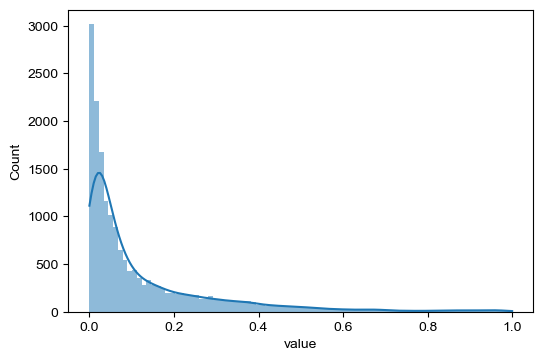

In [28]:
plt.figure(dpi=100)
sns.histplot(relations, kde=True, stat="count", linewidth=0)
sns.set_style("whitegrid")
plt.xlabel('value')
plt.xticks()
plt.show()

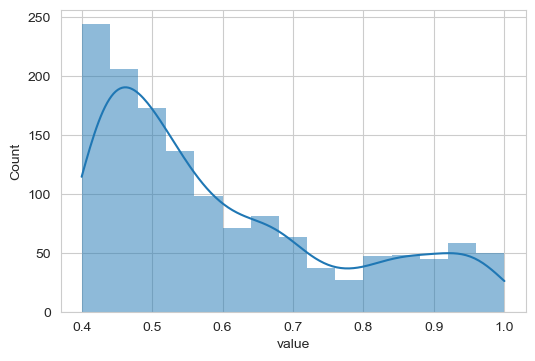

In [29]:
#zoom in greater then 0.4
bounded_correlation = [i for i in relations if i > 0.4]

plt.figure(dpi=100)
sns.histplot(bounded_correlation, kde=True, stat="count", linewidth=0)
sns.set_style("whitegrid")
plt.xlabel('value')
plt.xticks()
plt.show()

we have a lot of columns with over 0.8 correlation with removing 
these columns the information would not be changed
But for achieving more accurate models we don't do this

In [30]:
#This approach is fatsitc it looks at the previous column if the correlation is high it removes it

# Create correlation matrix
corr_matrix = toxcast_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features
final_toxcast_data = toxcast_data.drop(to_drop, axis=1)

9045


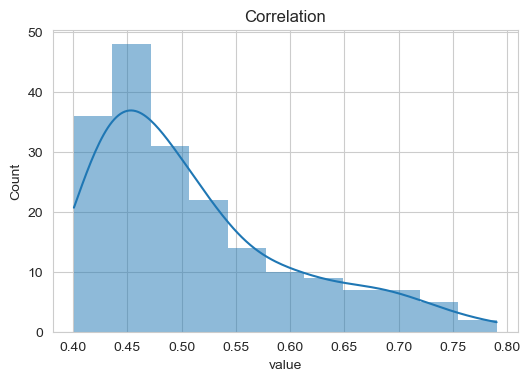

In [31]:
#zoom in greater then 0.4
final_relations = get_top_abs_correlations(final_toxcast_data)[0].values
bounded_correlation = [i for i in final_relations if i > 0.4]
plt.figure(dpi=100)
sns.histplot(bounded_correlation, kde=True, stat="count", linewidth=0)
sns.set_style("whitegrid")
plt.title('Correlation')
plt.xlabel('value')
plt.xticks()
plt.show()

Wow it looks like a normal correlation

In [32]:
final_toxcast_data.shape[1]

135

In [33]:
final_toxcast_data

,0,1,14,15,16,17,18,19,20,21,...,180,181,182,183,184,185,186,187,188,189
0,0.975099,0.013842,5.438167e-01,5.346966e-01,6.893569e-07,0.212674,0.117444,2.509948e-11,8.947108e-01,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.307979
1,0.996567,0.006574,9.228296e-01,2.175235e-08,6.893569e-07,0.100218,0.019674,2.509948e-11,9.258417e-11,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.673632
2,0.627583,0.010335,4.074888e-10,2.648697e-01,6.893569e-07,0.100218,0.323450,8.085811e-01,8.568377e-01,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.591018
3,0.975099,0.013568,5.438167e-01,5.346966e-01,6.893569e-07,0.212674,0.135223,2.509948e-11,8.947108e-01,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.187246
4,0.975099,0.013472,5.438167e-01,5.346966e-01,6.893569e-07,0.405153,0.019674,2.509948e-11,8.947108e-01,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.317261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,0.989697,0.054932,4.074888e-10,5.390041e-01,6.893569e-07,0.615115,0.155749,4.810067e-01,9.999396e-01,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,1.000000e+00,0.166633,0.008322
7827,0.000020,0.089503,8.294955e-01,6.547047e-01,6.893569e-07,0.100218,0.019674,1.734398e-01,8.501810e-01,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.340066
7828,0.000020,0.042283,6.802820e-01,9.062810e-01,6.893569e-07,0.100218,0.019674,1.734398e-01,8.501810e-01,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.225839
7829,0.000020,0.027747,8.294955e-01,6.547047e-01,6.893569e-07,0.100218,0.019674,2.509948e-11,9.664136e-01,5.856109e-17,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.275985


In [34]:
final_toxcast_data['label'] = label
final_toxcast_data.columns = list(
    range(final_toxcast_data.shape[1] - 1)) + ['label']
final_toxcast_data.to_csv('final_toxcast.csv', index=False)

## Splitting Data

In [35]:
df = pd.read_csv('final_toxcast.csv')

In [36]:
X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=42)

## Modeling

#### Metric Functions

In [64]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = ", accuracy_score(y_actual, y_predicted))
    print("Precision = ", precision_score(y_actual, y_predicted))
    print("Recall = ", recall_score(y_actual, y_predicted))
    print("F1 Score = ", f1_score(y_actual, y_predicted))
    display(
        pd.crosstab(y_actual,
                    y_predicted,
                    rownames=["Actual"],
                    colnames=["Predicted"]))


def generate_auc_roc_curve(clf, X_test, y_test):
    sns.set(style="darkgrid")
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(dpi=100)
    plt.plot(fpr,
             tpr,
             label="AUC ROC Curve with Area Under the curve =%.2f" % auc)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

### Adaboost

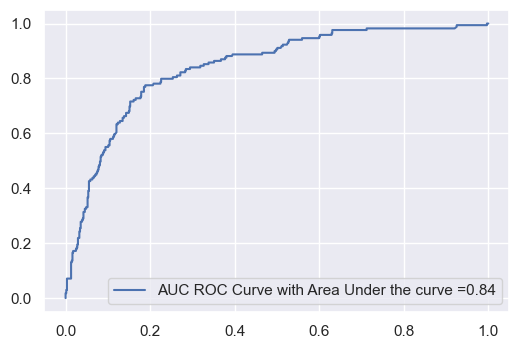

Accuracy =  0.8252551020408163
Precision =  0.6212121212121212
Recall =  0.48520710059171596
F1 Score =  0.5448504983388704


Predicted,0.0,1.0
Actual,,
0.0,565,50
1.0,87,82


In [57]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_hat = ada_clf.predict(X_test)
generate_auc_roc_curve(ada_clf, X_test, y_test)
generate_model_report(y_test, y_hat)

### Random Forrest

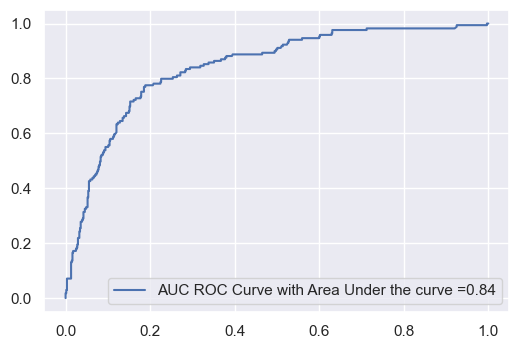

Accuracy =  0.8443877551020408
Precision =  0.7373737373737373
Recall =  0.4319526627218935
F1 Score =  0.5447761194029851


Predicted,0.0,1.0
Actual,,
0.0,589,26
1.0,96,73


In [56]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_hat = rf_clf.predict(X_test)
generate_auc_roc_curve(ada_clf, X_test, y_test)
generate_model_report(y_test, y_hat)

# QM9

In [167]:
qm9 = pd.read_csv('qm9_features.csv')

In [160]:
qm9_labels = pd.read_csv('qm9_labels.csv')

In [158]:
qm9_labels.head()

,label_mu,label_alpha,label_homo,label_lumo,label_gap,label_r2,label_zpve,label_cv,label_u0
0,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,6.469,-40.478930
1,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,6.316,-56.525887
2,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,6.002,-76.404702
3,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,8.574,-77.308427
4,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,6.278,-93.411888


In [121]:
qm9_labels.columns = 'label_' + qm9_labels.columns

In [165]:
#This approach is fatsitc it looks at the previous column if the correlation is high it removes it

# Create correlation matrix
corr_matrix = qm9_labels.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

# Drop features
qm9_labels = qm9_labels.drop(to_drop, axis=1)

In [128]:
get_top_abs_correlations(qm9_labels)[0][0]

66


0.9999999999999923

In [162]:
print(get_top_abs_correlations(qm9_labels).head(15))

66
                   0
u298  h298  1.000000
u0    h298  1.000000
      u298  1.000000
      g298  1.000000
h298  g298  1.000000
u298  g298  1.000000
lumo  gap   0.890274
zpve  cv    0.740304
alpha zpve  0.732357
      cv    0.699340
r2    cv    0.694286
lumo  zpve  0.654120
gap   zpve  0.585073
alpha r2    0.556891
mu    lumo  0.385425


In [131]:
to_drop

['label_u298', 'label_h298', 'label_g298']

In [132]:
df = pd.concat([qm9, qm9_labels], axis=1)

In [134]:
crr = get_top_abs_correlations(df)

14706


In [140]:
'label_mu' in qm9_labels.columns

True

In [146]:
crr

0
('fr_COO', <class 'numpy.float64'>)             ('fr_COO2', <class 'numpy.float64'>)                1.000000
('fr_nitro_arom', <class 'numpy.float64'>)      ('fr_nitro_arom_nonortho', <class 'numpy.float6...  1.000000
('fr_Ar_NH', <class 'numpy.float64'>)           ('fr_Nhpyrrole', <class 'numpy.float64'>)           1.000000
('MaxAbsEStateIndex', <class 'numpy.float64'>)  ('MaxEStateIndex', <class 'numpy.float64'>)         1.000000
('ExactMolWt', <class 'numpy.float64'>)         ('MolWt', <class 'numpy.float64'>)                  0.999993
...                                                                                                      ...
('EState_VSA7', <class 'numpy.float64'>)        ('fr_dihydropyridine', <class 'numpy.float64'>)     0.000018
('fr_dihydropyridine', <class 'numpy.float64'>) ('fr_nitro_arom', <class 'numpy.float64'>)          0.000013
                                                ('fr_nitro_arom_nonortho', <class 'numpy.float6...  0.000013
('SlogP_VSA6', <class 'numpy.float64'>)         ('fr_Ar_COO', <class 'numpy.float64'>)              0.000009
('fr_HOCCN', <class 'numpy.float64'>)           ('fr_aldehyde', <class 'numpy.float64'>)            0.000007

[14706 rows x 1 columns]

In [150]:
"('fr_COO', <class 'numpy.float64'>)" in crr.index[0]

True

In [155]:
for i in crr[crr[0] > 0.9].index:
    if i[0] in qm9_labels.columns:
        print(i)
    if i[1] in qm9_labels.columns:
        s = i
        print(i)

("('HeavyAtomMolWt', <class 'numpy.float64'>)", 'label_u0')


In [166]:
qm9_labels

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0
0,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,6.469,-40.478930
1,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,6.316,-56.525887
2,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,6.002,-76.404702
3,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,8.574,-77.308427
4,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,6.278,-93.411888
...,...,...,...,...,...,...,...,...,...
133880,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,23.658,-400.633868
133881,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,23.697,-400.629713
133882,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,23.972,-380.753918
133883,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,24.796,-364.720374


In [168]:
qm9['lable'] = qm9_labels['u0']

In [171]:
qm9.to_csv('final_qm9.csv', index=False)
qm9_labels.to_csv('final_qm9_labels.csv', index=False)

## Modeling

In [15]:
qm9 = pd.read_csv('final_qm9.csv')

In [20]:
qm9.head()

,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)",...,"('fr_piperzine', <class 'numpy.float64'>)","('fr_priamide', <class 'numpy.float64'>)","('fr_pyridine', <class 'numpy.float64'>)","('fr_quatN', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)",lable
0,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.187493,-40.478930
1,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.228070,-56.525887
2,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.156089,-76.404702
3,0.974937,0.000625,1.574798e-06,2.191668e-09,2.296717e-07,1.101184e-06,1.498512e-07,0.000038,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,1.000000e+00,0.168378,4.703598e-08,0.166633,0.160976,-77.308427
4,0.974937,0.000646,1.574798e-06,7.501717e-11,1.174156e-07,1.101184e-06,5.282567e-08,0.000033,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.197878,-93.411888


In [19]:
X = qm9.drop(['lable'], axis=1)
y = qm9['lable']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=42)

### Adaboost

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
ada_regressor = AdaBoostRegressor()
ada_regressor.fit(X_train, y_train)
y_hat = ada_regressor.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_hat)
rmse = mean_squared_error(y_test, y_hat, squared=False)
mae = mean_absolute_error(y_test, y_hat)

mse, rmse, mae

(68.86508964490348, 8.298499240519545, 5.5647150172085995)

### Random Forrest

In [24]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_hat2 = rf_regressor.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_hat2)
rmse = mean_squared_error(y_test, y_hat2, squared=False)
mae = mean_absolute_error(y_test, y_hat2)

mse, rmse, mae

(0.9350828688311897, 0.966996829793764, 0.03876871458112032)

# Tox21

In [31]:
X = pd.read_csv('tox21_x.csv')
y = pd.read_csv('tox21_y.csv')

In [36]:
yy = pd.read_csv('tox211.csv')
yy = yy.drop(['smiles'], axis=1)

In [39]:
portion = 0
for i in yy.columns:
    zero, one = yy[i].value_counts()
    if one / zero > portion:
        final_label = i
        portion = one / zero

In [50]:
yy[yy['SR-ARE'] == 1].shape

(942, 12)

In [57]:
yy[yy['NR-AR'] == 1].shape

(309, 12)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y['NR-AR'],
                                                    test_size=0.1,
                                                    random_state=42)

## Modeling

### Adaboost

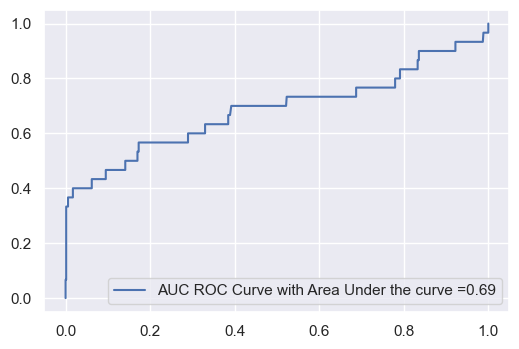

Accuracy =  0.9696132596685083
Precision =  0.9
Recall =  0.3
F1 Score =  0.45000000000000007


Predicted,0.0,1.0
Actual,,
0.0,693,1
1.0,21,9


In [65]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_hat = ada_clf.predict(X_test)
generate_auc_roc_curve(ada_clf, X_test, y_test)
generate_model_report(y_test, y_hat)

### Random Forrest

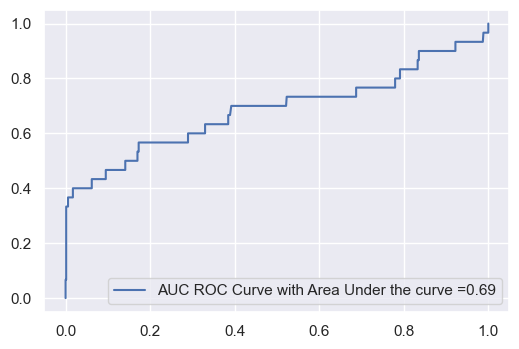

Accuracy =  0.9737569060773481
Precision =  1.0
Recall =  0.36666666666666664
F1 Score =  0.5365853658536585


Predicted,0.0,1.0
Actual,,
0.0,694,0
1.0,19,11


In [67]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_hat = rf_clf.predict(X_test)
generate_auc_roc_curve(ada_clf, X_test, y_test)
generate_model_report(y_test, y_hat)